# DA 320 Midterm Project - MongoDB Notebook

This Jupyter notebook is to read the data from MongoDB, do some transformation, and analyze the data.

In [9]:
import certifi
import pandas as pd
import json
import pymongo


CREDENTIALS_FILE = "D:\\BC fall quarter 2022\\DA320 14730 - F22 - Data Acquisition & Mngmt\\week 6\\credentials.json"
MONGO_DB_CONN_STR_KEY = "mongodb_connection_string"
DATABASE_NAME = "da320ZhanjuLi"
MIDTERM_METACRITIC_COLL_NAME = "midterm_metacritic"

with open(CREDENTIALS_FILE) as f:
    data = json.load(f)
    mongodb_connection_string = data[MONGO_DB_CONN_STR_KEY]


client = pymongo.MongoClient(mongodb_connection_string, tlsCAFile=certifi.where())
da320_database = client[DATABASE_NAME]

midterm_metacritic = da320_database[MIDTERM_METACRITIC_COLL_NAME]

metacritic_df = pd.DataFrame(midterm_metacritic.find())
print(metacritic_df.shape)

metacritic_df.release_date = pd.to_datetime(metacritic_df.release_date)
metacritic_df['year'] = metacritic_df.release_date.dt.year
metacritic_df['month'] = metacritic_df.release_date.dt.month
metacritic_df.metascore = pd.to_numeric(metacritic_df.metascore)

metacritic_df.head()


(11844, 6)


,_id,title,release_date,description,metascore,image_url,year,month
0,6369d0a3913edf4c6909932e,"Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12
1,6369d0a3913edf4c6909932f,Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10
2,6369d0a3913edf4c69099330,Beau Travail,2000-03-31,The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...,2000,3
3,6369d0a3913edf4c69099331,Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...,2000,9
4,6369d0a3913edf4c69099332,Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6


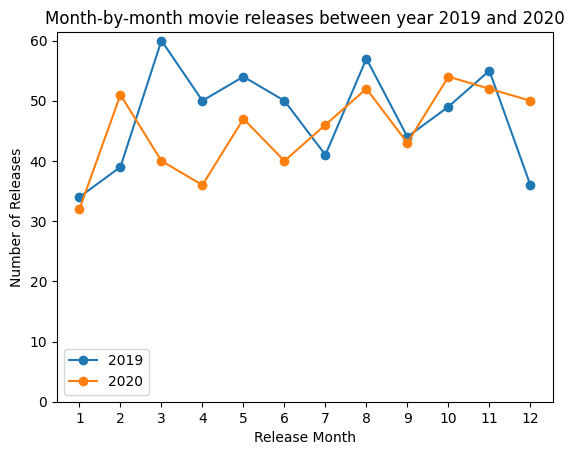

In [48]:
from matplotlib import pyplot

# compare the number of movies released month-by-month between 2019 and 2020 (i.e. before and after pandemic)
movies_from_2019 = metacritic_df[metacritic_df["year"] == 2019]
movies_from_2020 = metacritic_df[metacritic_df["year"] == 2020]

releases_by_month_2019 = movies_from_2019[["month", "title"]].groupby("month", as_index=False)["title"].count()
releases_by_month_2020 = movies_from_2020[["month", "title"]].groupby("month", as_index=False)["title"].count()

releases_by_month_2019.head()

months = list(range(1, 13))

pyplot.title("Month-by-month movie releases between year 2019 and 2020")
pyplot.xlabel("Release Month")
pyplot.ylabel("Number of Releases")
pyplot.xticks(months)
pyplot.plot(releases_by_month_2019.month, releases_by_month_2019.title, "-o", label="2019")
pyplot.plot(releases_by_month_2020.month, releases_by_month_2020.title, "-o", label="2020")
pyplot.ylim([0, None])
pyplot.legend()
pyplot.show()





Comparing the number of movies released each month between 2019 and 2020, we can see between March 2020 and June 2020, there were significantly fewer movies released. There was no surprise because that was when the pandemic started and there was lockdown, and many businesses were closed.

But the interesting thing is in December 2020, the number of movie releases was significantly more than that from December 2019. Now I want to know which one is closer to normal, so next I will also plot the month-by-month number of movies released averaged from 2000 - 2018.

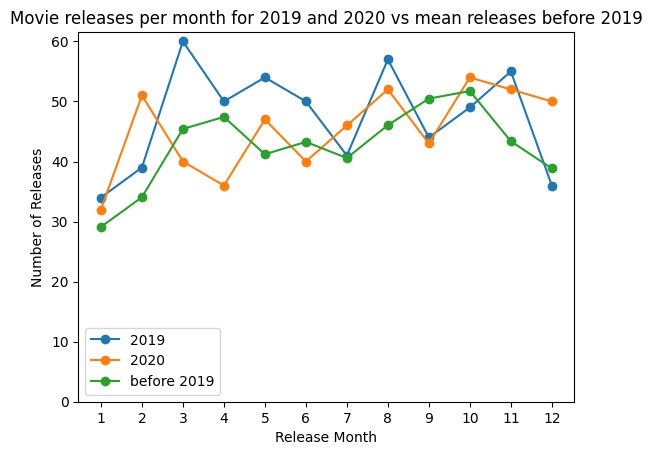

In [52]:
movies_before_2019 = metacritic_df[metacritic_df["year"] < 2019]
releases_by_month_before_2019 = movies_before_2019[["month", "year", "title"]].groupby(["month", "year"], as_index=False)["title"].count()

releases_by_month_before_2019.head()

mean_month_release_before_2019 = releases_by_month_before_2019.groupby(["month"], as_index=False)["title"].mean()

mean_month_release_before_2019.head()

pyplot.title("Movie releases per month for 2019 and 2020 vs mean releases before 2019")
pyplot.xlabel("Release Month")
pyplot.ylabel("Number of Releases")
pyplot.xticks(months)
pyplot.plot(releases_by_month_2019.month, releases_by_month_2019.title, "-o", label="2019")
pyplot.plot(releases_by_month_2020.month, releases_by_month_2020.title, "-o", label="2020")
pyplot.plot(mean_month_release_before_2019.month, mean_month_release_before_2019.title, "-o", label="before 2019")
pyplot.ylim([0, None])
pyplot.legend()
pyplot.show()



From the graph above, although the entire year of 2019 doesn't match the average from 2000-2018 that closely, we can see for the months of December, the number of releases in 2019 is very close to the average before 2019, and the same data for 2020 is much higher.

I think the reason for that is because in 2020 when the pandemic first hit, many movies postponed their releases towards the end of the year.

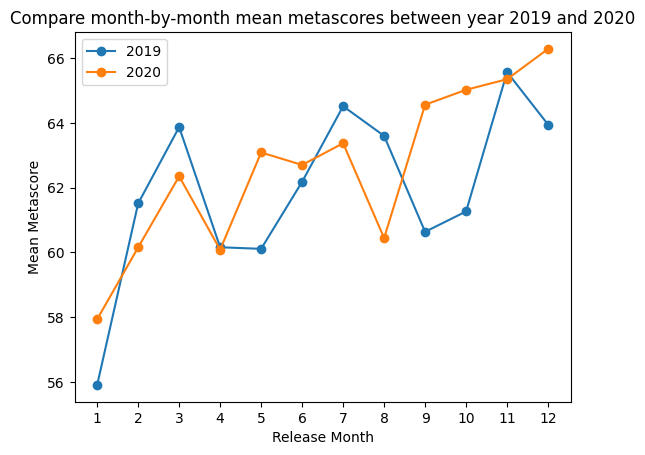

In [56]:
from matplotlib import pyplot

# compare movie average metadata scores month-by-month between 2019 and 2020 (i.e. before and after pandemic)
mean_score_by_month_2019 = movies_from_2019[["month", "metascore"]].groupby("month", as_index=False)["metascore"].mean()
mean_score_by_month_2020 = movies_from_2020[["month", "metascore"]].groupby("month", as_index=False)["metascore"].mean()

pyplot.title("Compare month-by-month mean metascores between year 2019 and 2020")
pyplot.xlabel("Release Month")
pyplot.ylabel("Mean Metascore")
pyplot.xticks(months)
pyplot.plot(mean_score_by_month_2019.month, mean_score_by_month_2019.metascore, "-o", label="2019")
pyplot.plot(mean_score_by_month_2020.month, mean_score_by_month_2020.metascore, "-o", label="2020")
pyplot.legend()
pyplot.show()




From the graph above, we can see that from September to December 2020, the average metascores are significantly higher than these from the same period in 2019. I believe this is also due to the postponing of movie releases in 2020 after the pandemic hit. Studios decided to postpone movie releases, especially when they feel a movie was a good one and didn't want to release it during the early lockdown period, fearing it may not get the expected ticket sales.  These movies got released in the last quarter of the year and received good reviews because they were good movies.